<a href="https://colab.research.google.com/github/eunyhwang/TextMining/blob/main/Text_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2주차 영상 링크: https://youtu.be/k5aCTKcQ7r8

# 1. Data Collecting

## Web-Crawling

In [ ]:
!pip install requests #특정 URL로부터 HTML 문서를 가져오는 작업 수행
!pip install beautifulsoup4 #HTML 문서에서 데이터를 추출하는 작업 수행

In [ ]:
import requests
from bs4 import BeautifulSoup

# Step 1: Specify the URL
url = 'https://n.news.naver.com/mnews/article/025/0003396529'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the content with BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the article container
    article_container = soup.find('div', class_='newsct_article')

    if article_container:
        # Extract the article text
        paragraphs = article_container.find_all('article', id='dic_area')
        article_text = ''

        # Loop through each paragraph and get the text
        for paragraph in paragraphs:
            article_text += paragraph.get_text(separator='\n').strip() + '\n'

        # Save the article text to a file
        with open('crawled_article.txt', 'w', encoding='utf-8') as file:
            file.write(article_text)

        print("Article extracted and saved to crawled_article.txt")
    else:
        print("Article container not found.")
else:
    print(f"Failed to retrieve the article. Status code: {response.status_code}")

Article extracted and saved to crawled_article.txt


## Extract Text from PDF

In [ ]:
pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 48.9 MB/s eta 0:00:00


In [ ]:
import fitz  # PyMuPDF의 별칭

def extract_text_from_pdf(file_path):
    text = ""
    with fitz.open(file_path) as pdf:
        for page_num in range(len(pdf)):
            page = pdf[page_num]
            text += page.get_text()
    return text

def save_text_to_file(text, output_file):
    with open(output_file, "w", encoding="utf-8") as file:
        file.write(text)

# 사용 예시
file_path = "2023_POSCO_ESG_Report.pdf" ####
pdf_text = extract_text_from_pdf(file_path)
save_text_to_file(pdf_text, "output.txt") ####

# 데이터 전처리

## 불필요한 문자 및 특수 문자 제거

In [ ]:
sample_text = " 안녕하세요! 오늘은 날씨가 정말 좋습니다. 하늘은 맑고 기온도 적당해서 외출하기에 딱 좋은 날이에요. 저는 요즘 데이터 사이언스와 머신러닝에 푹 빠져 있습니다. 다양한 알고리즘을 공부하고 실제 데이터로 실습을 해보며 많은 것을 배우고 있어요. 정말 재미있답니다! ㅎㅎㅎ 여러분은 어떤 것에 관심이 있으신가요? 혹시 저와 같은 분야에 관심이 있으시다면 함께 이야기해봐요. 서로의 경험을 공유하면서 더 나은 방향으로 나아갈 수 있을 것 같아요. 이 글을 읽고 계신 여러분도 유익한 하루 보내세요! ^^ 또 다른 흥미로운 주제로 대화할 기회가 있기를 바랍니다."

In [ ]:
import re

def clean_text(text):
    text = re.sub(r"<[^>]+>", "", text)  # HTML 태그 제거
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # URL 제거
    text = re.sub(r"\S+@\S+", "", text)  # 이메일 제거
    text = re.sub(r"[^가-힣a-zA-Z0-9\s]", "", text)  # 특수 문자 제거
    return text

In [ ]:
cleansed_text=clean_text(sample_text)

' 안녕하세요 오늘은 날씨가 정말 좋습니다 하늘은 맑고 기온도 적당해서 외출하기에 딱 좋은 날이에요 저는 요즘 데이터 사이언스와 머신러닝에 푹 빠져 있습니다 다양한 알고리즘을 공부하고 실제 데이터로 실습을 해보며 많은 것을 배우고 있어요 정말 재미있답니다  여러분은 어떤 것에 관심이 있으신가요 혹시 저와 같은 분야에 관심이 있으시다면 함께 이야기해봐요 서로의 경험을 공유하면서 더 나은 방향으로 나아갈 수 있을 것 같아요 이 글을 읽고 계신 여러분도 유익한 하루 보내세요  또 다른 흥미로운 주제로 대화할 기회가 있기를 바랍니다'

## 정규화 (Normalization)

In [ ]:
!pip install soynlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.8/416.8 kB 6.5 MB/s eta 0:00:00


반복 문자나 특수한 텍스트를 정규화하여 표준 형태로 변환. SoyNLP 사용

In [ ]:
from soynlp.normalizer import repeat_normalize

def normalize_text(text):
    return repeat_normalize(text, num_repeats=2)

In [ ]:
normalised_text = normalize_text(sample_text)

'안녕하세요! 오늘은 날씨가 정말 좋습니다. 하늘은 맑고 기온도 적당해서 외출하기에 딱 좋은 날이에요. 저는 요즘 데이터 사이언스와 머신러닝에 푹 빠져 있습니다. 다양한 알고리즘을 공부하고 실제 데이터로 실습을 해보며 많은 것을 배우고 있어요. 정말 재미있답니다! ㅎㅎㅎ 여러분은 어떤 것에 관심이 있으신가요? 혹시 저와 같은 분야에 관심이 있으시다면 함께 이야기해봐요. 서로의 경험을 공유하면서 더 나은 방향으로 나아갈 수 있을 것 같아요. 이 글을 읽고 계신 여러분도 유익한 하루 보내세요! ^^ 또 다른 흥미로운 주제로 대화할 기회가 있기를 바랍니다.'

##문장 분리 (Sentence Segmentation)

In [ ]:
pip install kss

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import kss

def split_sentences(text):
    return kss.split_sentences(text)

## 토큰화 (Tokenization)

문장을 단어 단위로 분리하여 형태소 분석기를 통해 토큰화

In [ ]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 26.0 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Okt

okt = Okt()

def tokenize_text(text):
    return okt.morphs(text)


In [ ]:
sample_text_processed = tokenize_text(sample_text)
sample_text_processed

['안녕하세요',
 '!',
 '오늘',
 '은',
 '날씨',
 '가',
 '정말',
 '좋습니다',
 '.',
 '하늘',
 '은',
 '맑고',
 '기온',
 '도',
 '적당해서',
 '외출',
 '하기에',
 '딱',
 '좋은',
 '날',
 '이에요',
 '.',
 '저',
 '는',
 '요즘',
 '데이터',
 '사이언스',
 '와',
 '머신',
 '러닝',
 '에',
 '푹',
 '빠져',
 '있습니다',
 '.',
 '다양한',
 '알고리즘',
 '을',
 '공부',
 '하고',
 '실제',
 '데이터',
 '로',
 '실습',
 '을',
 '해보며',
 '많은',
 '것',
 '을',
 '배우고',
 '있어요',
 '.',
 '정말',
 '재미있답니다',
 '!',
 'ㅎㅎㅎ',
 '여러분',
 '은',
 '어떤',
 '것',
 '에',
 '관심',
 '이',
 '있으신',
 '가요',
 '?',
 '혹시',
 '저',
 '와',
 '같은',
 '분야',
 '에',
 '관심',
 '이',
 '있으시다면',
 '함께',
 '이야기',
 '해봐요',
 '.',
 '서로',
 '의',
 '경험',
 '을',
 '공유',
 '하면서',
 '더',
 '나은',
 '방향',
 '으로',
 '나아갈',
 '수',
 '있을',
 '것',
 '같아요',
 '.',
 '이',
 '글',
 '을',
 '읽고',
 '계신',
 '여러분',
 '도',
 '유익한',
 '하루',
 '보내세요',
 '!',
 '^^',
 '또',
 '다른',
 '흥미로운',
 '주제',
 '로',
 '대화',
 '할',
 '기회',
 '가',
 '있기를',
 '바랍니다',
 '.']

## 불용어 제거 (Stopwords Removal)

한국어에서 자주 쓰이지만 의미를 갖지 않는 불용어(은, 는, 이, 가 등)를 제거

In [ ]:
stopwords = ["은", "는", "이", "가", "도", "을", "를", "에", "의", "와", "으로", "그리고", "있다", "하다", "되다", "등", "과", "와", "위해", "수", "및", "포스코", "적", "가다","로"]

def remove_stopwords(tokens):
    result = []
    for token in tokens:
        if token not in stopwords:
            result.append(token)
    return result
     #[token for token in tokens if token not in stopwords]


In [ ]:
sample_text_processed = remove_stopwords(sample_text_processed)
sample_text_processed

## 형태소 분석 및 품사 태깅 (POS Tagging) & 어간 추출 (Stemming)

각 단어에 품사 태그를 부여하여 후에 필요한 품사를 사용할 수 있게. stem = True 기능으로 어간 추출도 동시 진행.


In [ ]:
def pos_tagging(tokens):
    return okt.pos(" ".join(tokens), stem = True)

In [ ]:
sample_text_processed = pos_tagging(sample_text_processed)
sample_text_processed

[('안녕하세요', 'Adjective'),
 ('!', 'Punctuation'),
 ('오늘', 'Noun'),
 ('날씨', 'Noun'),
 ('정말', 'Noun'),
 ('좋습니다', 'Adjective'),
 ('.', 'Punctuation'),
 ('하늘', 'Noun'),
 ('맑고', 'Adjective'),
 ('기온', 'Noun'),
 ('적당해서', 'Adjective'),
 ('외출', 'Noun'),
 ('하기에', 'Verb'),
 ('딱', 'Adverb'),
 ('좋은', 'Adjective'),
 ('날', 'Noun'),
 ('이에요', 'Josa'),
 ('.', 'Punctuation'),
 ('저', 'Noun'),
 ('요즘', 'Noun'),
 ('데이터', 'Noun'),
 ('사이언스', 'Noun'),
 ('머신', 'Noun'),
 ('러닝', 'Noun'),
 ('푹', 'Noun'),
 ('빠져', 'Verb'),
 ('있습니다', 'Adjective'),
 ('.', 'Punctuation'),
 ('다양한', 'Adjective'),
 ('알고리즘', 'Noun'),
 ('공부', 'Noun'),
 ('하고', 'Verb'),
 ('실제', 'Noun'),
 ('데이터', 'Noun'),
 ('로', 'Noun'),
 ('실습', 'Noun'),
 ('해보며', 'Verb'),
 ('많은', 'Adjective'),
 ('것', 'Noun'),
 ('배우고', 'Verb'),
 ('있어요', 'Adjective'),
 ('.', 'Punctuation'),
 ('정말', 'Noun'),
 ('재미있답니다', 'Adjective'),
 ('!', 'Punctuation'),
 ('ㅎㅎㅎ', 'KoreanParticle'),
 ('여러분', 'Noun'),
 ('어떤', 'Adjective'),
 ('것', 'Noun'),
 ('관심', 'Noun'),
 ('있으신', 'Adjective'),
 ('가

필요한 품사만 사용



In [ ]:
def stem_tokens(tokens):
    stemmed_words = []

    for word, tag in tokens:
        if tag in ["Noun", "Adjective"]: #"Verb"
            stemmed_words.append(word)

    return stemmed_words


In [ ]:
sample_text_processed = stem_tokens(sample_text_processed)
sample_text_processed

['안녕하세요',
 '오늘',
 '날씨',
 '정말',
 '좋습니다',
 '하늘',
 '맑고',
 '기온',
 '적당해서',
 '외출',
 '하기에',
 '좋은',
 '날',
 '저',
 '요즘',
 '데이터',
 '사이언스',
 '머신',
 '러닝',
 '푹',
 '빠져',
 '있습니다',
 '다양한',
 '알고리즘',
 '공부',
 '하고',
 '실제',
 '데이터',
 '로',
 '실습',
 '해보며',
 '많은',
 '것',
 '배우고',
 '있어요',
 '정말',
 '재미있답니다',
 '여러분',
 '어떤',
 '것',
 '관심',
 '있으신',
 '가요',
 '혹시',
 '저',
 '같은',
 '분야',
 '관심',
 '있으시다면',
 '이야기',
 '해봐요',
 '서로',
 '경험',
 '공유',
 '하면서',
 '더',
 '나은',
 '방향',
 '나아갈',
 '수',
 '있을',
 '것',
 '같아요',
 '글',
 '읽고',
 '계신',
 '여러분',
 '유익한',
 '하루',
 '보내세요',
 '또',
 '다른',
 '흥미로운',
 '주제',
 '로',
 '대화',
 '할',
 '기회',
 '있기를',
 '바랍니다']

## 함수 합치기

In [ ]:
def preprocess_korean_text(text):
    # 1. 클렌징
    text = clean_text(text)
    # 2. 정규화
    text = normalize_text(text)
    # 3. 문장 분리
    sentences = split_sentences(text)
    #print("this is sentences:", sentences)

    processed_tokens = []
    for sentence in sentences:
        # 4. 토큰화
        tokens = tokenize_text(sentence)
        # 5. 불용어 제거
        #tokens = remove_stopwords(tokens)
        # 6. 형태소 분석 및 품사 태깅
        tokens = pos_tagging(tokens)
        # 7. 어간 추출
        tokens = stem_tokens(tokens)
        tokens = remove_stopwords(tokens)
        processed_tokens.extend(tokens)

    return processed_tokens

In [ ]:
preprocess_korean_text(sample_text)= ptr

NameError: name 'sample_text' is not defined

# 3. Data Analysis

## 분석방법 1: Word Cloud

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# 전처리 결과
words = preprocess_korean_text(sample_text)

# 단어 빈도 계산
word_counts = Counter(words)

In [ ]:
word_counts

Counter({'안녕하다': 1,
         '오늘': 1,
         '날씨': 1,
         '정말': 2,
         '좋다': 2,
         '하늘': 1,
         '맑다': 1,
         '기온': 1,
         '적당하다': 1,
         '외출': 1,
         '하다': 4,
         '날': 1,
         '저': 2,
         '요즘': 1,
         '데이터': 2,
         '사이언스': 1,
         '머신': 1,
         '러닝': 1,
         '푹': 1,
         '빠지다': 1,
         '있다': 6,
         '다양하다': 1,
         '알고리즘': 1,
         '공부': 1,
         '실제': 1,
         '로': 2,
         '실습': 1,
         '해보다': 2,
         '많다': 1,
         '것': 3,
         '배우다': 1,
         '재미있다': 1,
         '여러분': 2,
         '어떻다': 1,
         '관심': 2,
         '가요': 1,
         '혹시': 1,
         '같다': 2,
         '분야': 1,
         '이야기': 1,
         '서로': 1,
         '경험': 1,
         '공유': 1,
         '더': 1,
         '나은': 1,
         '방향': 1,
         '나아가다': 1,
         '수': 1,
         '글': 1,
         '읽다': 1,
         '계시다': 1,
         '유익하다': 1,
         '하루': 1,
         '보내다': 1,
         '또

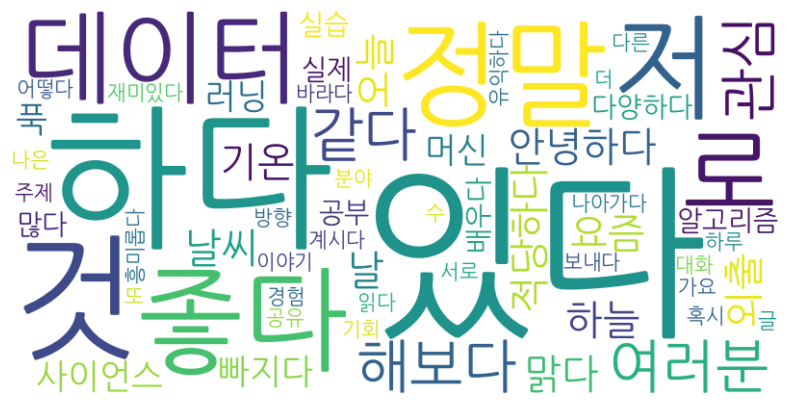

In [ ]:
# 워드 클라우드 생성
wordcloud = WordCloud(font_path='NanumGothic.otf', width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# 결과 출력
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.show()

### Output 파일 저장

In [ ]:
with open('output.txt', 'r', encoding='utf-8') as file:
    report_text = file.read()

words = preprocess_korean_text(report_text)

# 단어 빈도 계산
word_counts = Counter(words)

In [ ]:
#save preprocessed_words
with open('preprocessed_words.txt', 'w', encoding='utf-8') as file:
  for word in words:
    file.write(word + '\n')

In [ ]:
# filtering words appears fewer than 3

filtered_word_counts = {}

for word, count in word_counts.items():
  #print(count)
  if count >= 3:
    filtered_word_counts[word] = count

In [ ]:
filtered_word_counts

{'사이트': 3,
 '맵': 3,
 '대표이사': 30,
 '인사말': 7,
 '전략': 73,
 '중요': 20,
 '이슈': 95,
 '관리': 355,
 '성과': 78,
 '기후': 28,
 '행동': 50,
 '지배구조': 39,
 '탄소': 142,
 '중립': 49,
 '로드맵': 21,
 '리스크': 184,
 '지속': 104,
 '가능': 44,
 '기여': 39,
 '제품': 71,
 '환경': 338,
 '경영': 232,
 '운영': 277,
 '현황': 65,
 '오염': 29,
 '물질': 55,
 '수자원': 30,
 '생물다양성': 74,
 '자원': 34,
 '순환': 19,
 '정책': 136,
 '안전': 342,
 '보건': 105,
 '인권': 226,
 '피플': 14,
 '인재': 35,
 '조직': 63,
 '문화': 76,
 '공급망': 103,
 '책임': 84,
 '광물': 36,
 '동반성': 27,
 '장': 187,
 '지역': 196,
 '사회': 172,
 '공헌': 24,
 '투명': 23,
 '이사회': 89,
 '윤리경영': 59,
 '윤리': 169,
 '공정': 126,
 '거래': 158,
 '정보보호': 70,
 '리포트': 6,
 '연도': 9,
 '별': 103,
 '보고서': 56,
 '특별': 16,
 '데이터': 44,
 '이니셔티브': 28,
 '인증': 78,
 '수상': 42,
 '대외': 13,
 '평가': 185,
 '컨트': 19,
 '로버': 19,
 '시': 106,
 '철강': 99,
 '경쟁력': 22,
 '기반': 62,
 '지다': 70,
 '속': 33,
 '선도': 14,
 '들다': 161,
 '소통': 56,
 '나아가다': 6,
 '늘다': 539,
 '광양': 45,
 '전': 137,
 '기': 62,
 '로': 386,
 '신설': 19,
 '형': 30,
 '소환': 27,
 '원': 130,
 '제철': 34,
 '기술': 149,
 '개발

In [ ]:
with open ('word_count.txt', 'w', encoding= 'utf-8') as file:
  file.write(str(word_counts))
  print("word count saved to word_count.txt")


word count saved to word_count.txt


In [ ]:
with open ('filtered_word_count.txt', 'w', encoding= 'utf-8') as file:
  file.write(str(filtered_word_counts))
  print("word count saved to filtered_word_count.txt")

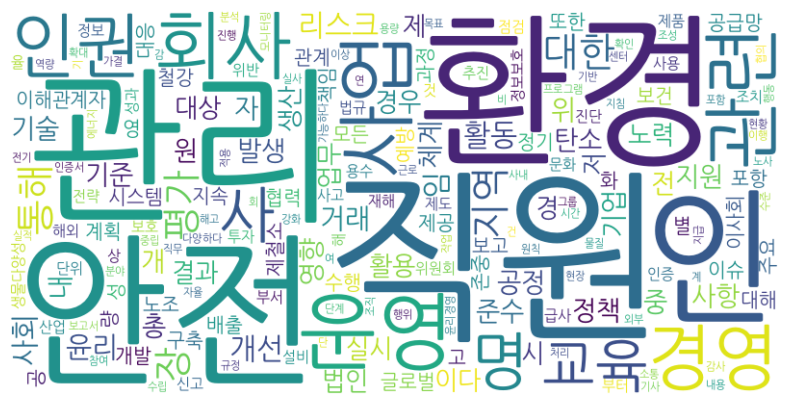

In [ ]:
# 워드 클라우드 생성
wordcloud = WordCloud(font_path='./NanumGothic.otf', width=800, height=400, background_color='white').generate_from_frequencies(filtered_word_counts)

# 결과 출력
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.show()

In [ ]:
#pip install --upgrade Pillow wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 3.3 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: pillow 10.4.0
    Uninstalling pillow-10.4.0:
      Successfully uninstalled pillow-10.4.0


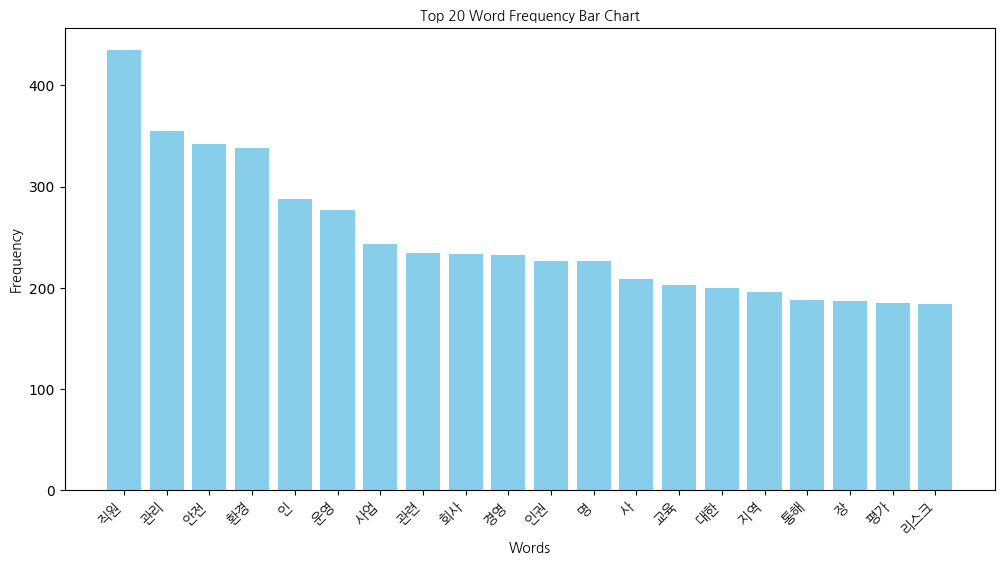

In [ ]:
import matplotlib.font_manager as fm
# Sort word counts for a clean bar chart
top20_word_counts = dict(sorted(filtered_word_counts.items(), key=lambda item: item[1], reverse=True)[:20])

font_path = './NanumGothic.otf'  # Path to the UTF-8 supporting font
font_prop = fm.FontProperties(fname=font_path)

# Create bar chart for top 20 words
plt.figure(figsize=(12, 6))
plt.bar(top20_word_counts.keys(), top20_word_counts.values(), color='skyblue')
plt.xlabel('Words', fontproperties=font_prop)
plt.ylabel('Frequency', fontproperties=font_prop)
plt.title('Top 20 Word Frequency Bar Chart', fontproperties=font_prop)
plt.xticks(rotation=45, ha="right", fontproperties=font_prop)
plt.show()

## 분석방법 2: TF-IDF

### Step-by-step

In [ ]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 8.9 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Okt

okt = Okt()

In [ ]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

docs = [
  '먹고 싶은 과일 사과', # document 1
  '먹고 싶은 과일 바나나', # document 2
  '길고 노란 바나나 바나나', # document 3
  '저는 과일 좋아요' # document 4
]


1. 단어 리스트 만들기

In [ ]:
vocab = []

for doc in docs:
  for word in okt.morphs(doc):
    if word not in vocab:
      vocab.append(word)

#vocab.sort()
print(vocab)


['먹고', '싶은', '과일', '사과', '바나나', '길고', '노란', '저', '는', '좋아요']


2. TF값 구하기: 특정 문서 d에서 단어 t가 나온 횟수

In [ ]:
tf = {}

for doc in docs:
  words = doc.split()
  print("this is words:", words)
  total_words = len(words)
 # print("this is total_words:", total_words)
  tf_doc = {}

  for word in words:

    tf_doc[word] = word.count(word) / total_words
    print("word.count:", word.count(word))

  tf[doc] = tf_doc

print(tf)

this is words: ['먹고', '싶은', '과일', '사과']


AttributeError: 'str' object has no attribute 'Count'

3. idf값 구하기: 특정 단어 t가 나온 문서의 갯수의 역

In [ ]:
import math #for log

N = len(docs)
idf = {}

for word in vocab:
  n_t = 0
  for doc in docs:
    if word in doc.split():
      n_t += 1
  print(word, n_t)
  idf[word] = math.log(N / (n_t + 1))

print(idf)

먹고 2
싶은 2
과일 3
사과 1
바나나 2
길고 1
노란 1
저 0
는 0
좋아요 1
{'먹고': 0.28768207245178085, '싶은': 0.28768207245178085, '과일': 0.0, '사과': 0.6931471805599453, '바나나': 0.28768207245178085, '길고': 0.6931471805599453, '노란': 0.6931471805599453, '저': 1.3862943611198906, '는': 1.3862943611198906, '좋아요': 0.6931471805599453}


4. tf-idf 구하기

In [ ]:
tf_idf = {}

for doc in docs:
    tf_idf_doc = {}

    for word in vocab:
        tf_idf_doc[word] = tf[doc][word] * idf[word]

    tf_idf[doc] = tf_idf_doc

print(tf_idf)

{'먹고 싶은 과일 사과': {'먹고': 0.07192051811294521, '싶은': 0.07192051811294521, '과일': 0.0, '사과': 0.17328679513998632, '바나나': 0.07192051811294521, '길고': 0.17328679513998632, '노란': 0.17328679513998632, '저': 0.34657359027997264, '는': 0.34657359027997264, '좋아요': 0.17328679513998632}, '먹고 싶은 과일 바나나': {'먹고': 0.07192051811294521, '싶은': 0.07192051811294521, '과일': 0.0, '사과': 0.17328679513998632, '바나나': 0.07192051811294521, '길고': 0.17328679513998632, '노란': 0.17328679513998632, '저': 0.34657359027997264, '는': 0.34657359027997264, '좋아요': 0.17328679513998632}, '길고 노란 바나나 바나나': {'먹고': 0.07192051811294521, '싶은': 0.07192051811294521, '과일': 0.0, '사과': 0.17328679513998632, '바나나': 0.07192051811294521, '길고': 0.17328679513998632, '노란': 0.17328679513998632, '저': 0.34657359027997264, '는': 0.34657359027997264, '좋아요': 0.17328679513998632}, '저는 과일 좋아요': {'먹고': 0.09589402415059362, '싶은': 0.09589402415059362, '과일': 0.0, '사과': 0.23104906018664842, '바나나': 0.09589402415059362, '길고': 0.23104906018664842, '노란': 0.23104906018664

In [ ]:
### visualising
for doc, values in tf_idf.items():
    print(f"TF-IDF for document: {doc}")
    for word, score in values.items():
        print(f"  {word}: {score:.4f}")

TF-IDF for document: 먹고 싶은 과일 사과
  먹고: 0.0719
  싶은: 0.0719
  과일: 0.0000
  사과: 0.1733
  바나나: 0.0719
  길고: 0.1733
  노란: 0.1733
  저: 0.3466
  는: 0.3466
  좋아요: 0.1733
TF-IDF for document: 먹고 싶은 과일 바나나
  먹고: 0.0719
  싶은: 0.0719
  과일: 0.0000
  사과: 0.1733
  바나나: 0.0719
  길고: 0.1733
  노란: 0.1733
  저: 0.3466
  는: 0.3466
  좋아요: 0.1733
TF-IDF for document: 길고 노란 바나나 바나나
  먹고: 0.0719
  싶은: 0.0719
  과일: 0.0000
  사과: 0.1733
  바나나: 0.0719
  길고: 0.1733
  노란: 0.1733
  저: 0.3466
  는: 0.3466
  좋아요: 0.1733
TF-IDF for document: 저는 과일 좋아요
  먹고: 0.0959
  싶은: 0.0959
  과일: 0.0000
  사과: 0.2310
  바나나: 0.0959
  길고: 0.2310
  노란: 0.2310
  저: 0.4621
  는: 0.4621
  좋아요: 0.2310


### TfidfVectorizer 사용

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

'''
input: a list of tokens
output: token tfidf
'''

def compute_tf_idf(token_list):
  token_list = [token for token in token_list if len(token) > 1] #filtering out short tokens
  #print("this is token_list:", token_list)
  text = ' '.join(token_list) #convert tokens back to text
  #print("this is text:",text)
  vectorizer = TfidfVectorizer(stop_words=None, token_pattern=r"(?u)\b\w+\b") #suitable for Korean
  tfidf_matrix = vectorizer.fit_transform([text]) #fit and transform the preprocessed tokens to get TF-IDF matrix
  feature_names = vectorizer.get_feature_names_out() #extract features(tokens) and tf-idf values
  tfidf_values = tfidf_matrix.toarray()[0]
  token_tfidf = dict(zip(feature_names, tfidf_values)) #save them into a dictionary

  return token_tfidf

In [ ]:
file_path = 'preprocessed_words.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    doc = file.read().strip()

token_list = doc.split()

In [ ]:
tf_idf_values = compute_tf_idf(token_list)
print("TF-IDF Values:", tf_idf_values)

this is token_list: ['사이트', '사이트', '대표이사', '인사말', '전략', '중요', '이슈', '관리', '성과', '기후', '행동', '지배구조', '탄소', '중립', '로드맵', '리스크', '관리', '지속', '가능', '기여', '제품', '환경', '경영', '운영', '현황', '오염', '물질', '수자원', '생물다양성', '자원', '순환', '정책', '안전', '보건', '안전', '보건', '정책', '인권', '인권', '정책', '피플', '인재', '경영', '조직', '문화', '정책', '공급망', '공급망', '관리', '책임', '광물', '동반성', '지역', '사회', '지역', '사회', '사회', '공헌', '투명', '경영', '이사회', '경영', '리스크', '관리', '정책', '윤리경영', '윤리', '공정', '거래', '정책', '정보보호', '정책', '정보보호', '리포트', '연도', '보고서', '특별', '보고서', '데이터', '환경', '사회', '지배구조', '이니셔티브', '인증', '수상', '이니셔티브', '인증', '수상', '대외', '평가', '컨트', '로버', '사이트', '굳다', '철강', '경쟁력', '기반', '가능', '경영', '선도', '여러분', '소통', '광양', '신설', '소환', '제철', '기술', '개발', '박차', '철강업', '탄소', '조업', '체제', '확립', '리더십', '발휘', '탄소', '원료', '조달', '체계', '안정', '구축', '탄소', '포집', '활용', '저장', '기술', '완성', '경제', '경쟁력', '탄소', '체제', '전환', '첫째', '탄소', '중립', '공정', '기술', '선도', '제품', '개발', '가속', '화하다', '경쟁력', '탄소', '제로', '전환', '구현', '현장', '안전', '우선', '생각', '아니다', '관계', '사의', '안전'

In [ ]:
sorted_data = dict(sorted(tf_idf_values.items(), key=lambda x: x[1], reverse=True))
sorted_data

In [ ]:
#filter out on a threshold

threshold = 0.1  # Set your threshold value

filtered_data = {word: value for word, value in tf_idf_values.items() if value > threshold}

sorted_filtered_data = dict(sorted(filtered_data.items(), key=lambda x: x[1], reverse=True))
sorted_filtered_data

{'직원': 0.2702424310478756,
 '관리': 0.22054267361378352,
 '안전': 0.21246646303074357,
 '환경': 0.20998147515903895,
 '운영': 0.17208541011554376,
 '사업': 0.15096301320605462,
 '관련': 0.14537179049471927,
 '회사': 0.14475054352679312,
 '경영': 0.14412929655886697,
 '인권': 0.14040181475131006,
 '교육': 0.1261131344890086,
 '대한': 0.12424939358523016,
 '지역': 0.12176440571352555,
 '통해': 0.11679442997011634,
 '평가': 0.11493068906633788,
 '개선': 0.11430944209841173,
 '리스크': 0.11430944209841173,
 '활동': 0.11430944209841173,
 '사회': 0.10685447848329793,
 '윤리': 0.10499073757951947}

### Visualising

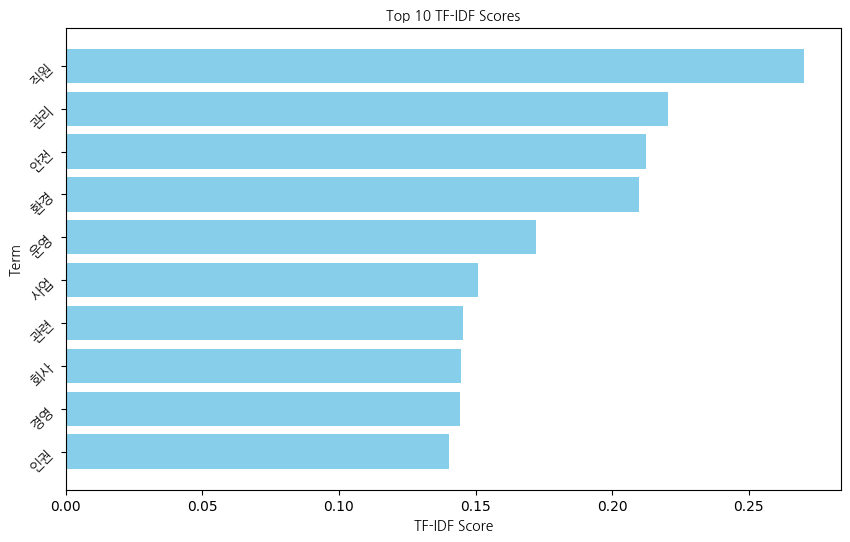

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = './NanumGothic.otf'  # Path to the UTF-8 supporting font
font_prop = fm.FontProperties(fname=font_path)

def plot_top_tfidf_terms(tf_idf_scores, top_n=10):
    # Sort terms by their TF-IDF score and select top_n terms
    sorted_scores = sorted(tf_idf_scores.items(), key=lambda x: x[1], reverse=True)[:top_n]
    terms, scores = zip(*sorted_scores)

    # Plot the terms and their TF-IDF scores
    plt.figure(figsize=(10, 6))
    plt.barh(terms, scores, color='skyblue')
    plt.xlabel("TF-IDF Score", fontproperties=font_prop)
    plt.ylabel("Term", fontproperties=font_prop)
    plt.title(f"Top {top_n} TF-IDF Scores", fontproperties=font_prop)
    plt.gca().invert_yaxis()  # Invert y-axis for highest score on top
    plt.yticks(rotation=45, ha="right", fontproperties=font_prop)
    plt.show()

plot_top_tfidf_terms(sorted_filtered_data)


하나 이상의 다큐먼트를 비교할 때는 Heat map을 사용해도 좋음.






## 분석방법 3: 동시 출현 단어 분석

### Co-occurrence Matrix

In [ ]:
from collections import defaultdict
import pandas as pd

# Step 1: Sample preprocessed tokens
preprocessed_tokens = ['사이트', '맵', '대표이사', '사이트', '인사말', '전략', '전략','이슈','전략']

# Step 2: Set the window size
window_size = 1

# Step 3: Initialize the co-occurrence matrix
co_occurrence_matrix = defaultdict(lambda: defaultdict(int))

# Step 4: Count co-occurrences
for i, token in enumerate(preprocessed_tokens):
  print(i, token)
  for j in range(max(0, i - window_size), min(len(preprocessed_tokens), i + window_size + 1)):
        if i != j:  # Avoid counting the token with itself
            co_occurrence_matrix[token][preprocessed_tokens[j]] += 1

# Step 5: Convert to DataFrame
co_occurrence_df = pd.DataFrame(co_occurrence_matrix).fillna(0)

# Display the co-occurrence DataFrame
print(co_occurrence_df)

0 사이트
1 맵
2 대표이사
3 사이트
4 인사말
5 전략
6 전략
7 이슈
8 전략
      사이트    맵  대표이사  인사말   전략   이슈
맵     2.0  0.0   1.0  1.0  0.0  0.0
대표이사  2.0  1.0   0.0  1.0  1.0  0.0
사이트   2.0  2.0   2.0  1.0  2.0  0.0
인사말   1.0  1.0   1.0  0.0  2.0  1.0
전략    2.0  0.0   1.0  2.0  6.0  3.0
이슈    0.0  0.0   0.0  1.0  3.0  0.0


In [ ]:
def compute_co_occurrence_matrix(tokens, window_size=1):
    co_occurrence_matrix = defaultdict(lambda: defaultdict(int))

    for i, token in enumerate(tokens):
        for j in range(max(0, i - window_size), min(len(tokens), i + window_size + 1)):
            if i != j:
                co_occurrence_matrix[token][tokens[j]] += 1

    co_occurrence_df = pd.DataFrame(co_occurrence_matrix).fillna(0)

    return co_occurrence_df

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 47605 (\N{HANGUL SYLLABLE MAEB}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/

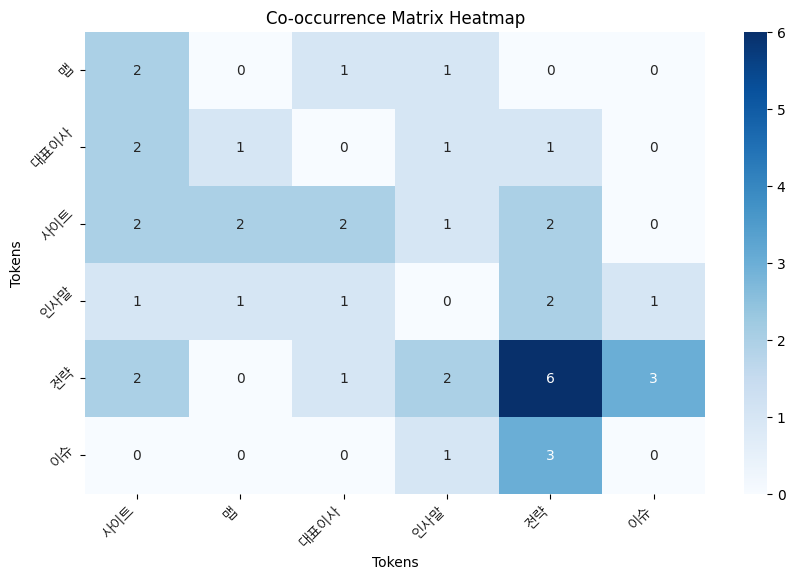

In [ ]:
import pandas as pd
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = './NanumGothic.otf'
font_prop = fm.FontProperties(fname=font_path)

plt.figure(figsize=(10, 6))
sns.heatmap(co_occurrence_df, annot=True, cmap='Blues', fmt='g', cbar=True)
plt.title('Co-occurrence Matrix Heatmap')
plt.xlabel('Tokens')
plt.ylabel('Tokens')
plt.xticks(rotation=45, ha="right", fontproperties=font_prop)
plt.yticks(rotation=45, ha="right", fontproperties=font_prop)
plt.show()


### 보고서 사용: 필터링

In [ ]:
file_path = 'preprocessed_words.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    doc = file.read().strip()

token_list = doc.split()

In [ ]:
co_occurrence_df = compute_co_occurrence_matrix(token_list)
print(co_occurrence_df)

      사이트    맵  대표이사  인사말   전략   중요   이슈   관리   성과   기후  ...   메일  무조건   오해  \
맵     4.0  0.0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
시     1.0  0.0   0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
사이트   0.0  4.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
대표이사  0.0  1.0   0.0  8.0  1.0  0.0  0.0  1.0  1.0  0.0  ...  0.0  0.0  0.0   
굳다    0.0  1.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...   ...  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
표기    0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
공문    0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
다툼    0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
남아    0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
북미    0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       편차   별개   사문   무례   인니   안과   내년  
맵     0.0

In [ ]:
# filter out tokens less than a threshold

from wordcloud import WordCloud
from collections import Counter

frequency_threshold = 200
token_counts = Counter(token_list)

#filtered_tokens

filtered_tokens = []
for token in token_list:
    if token_counts[token] >= frequency_threshold:
        filtered_tokens.append(token)
'''
#filtered_tokens
for token, counts in token_counts.items():
    if counts >= frequency_threshold:
        filtered_tokens.append(token)
'''
#filtered_tokens

'\n#filtered_tokens\nfor token, counts in token_counts.items():\n    if counts >= frequency_threshold:\n        filtered_tokens.append(token)\n'

In [ ]:
print("token_list:",len(token_list))
print("filtered_tokens:",len(filtered_tokens))

token_list: 42652
filtered_tokens: 4041


In [ ]:
co_occurrence_df = compute_co_occurrence_matrix(filtered_tokens, window_size = 30)
print(co_occurrence_df)

      관리    환경    경영    운영    안전    인권    사업     인    직원    대한    회사     사  \
관리  3286  2424  1265  1704  2133   786  1555  1471  1424  1039   907   942   
환경  2424  4876  1572  1359  1112   277  1781  1609   935   847   521   931   
경영  1265  1572  1362  1060   853   883   913  1040  1174   564   812   512   
운영  1704  1359  1060  1918  1240   422   938  1246  1913   827   906   673   
안전  2133  1112   853  1240  6894   480   870   859  1199   795   554  1284   
인권   786   277   883   422   480  3774   486   609  1645   758   856   285   
사업  1555  1781   913   938   870   486  1854  1123   903   712   803   847   
인   1471  1609  1040  1246   859   609  1123  1878  1775  1036  1314  1155   
직원  1424   935  1174  1913  1199  1645   903  1775  5394  1480  1999  1211   
대한  1039   847   564   827   795   758   712  1036  1480   854   926   482   
회사   907   521   812   906   554   856   803  1314  1999   926  1778   556   
사    942   931   512   673  1284   285   847  1155  1211   482  

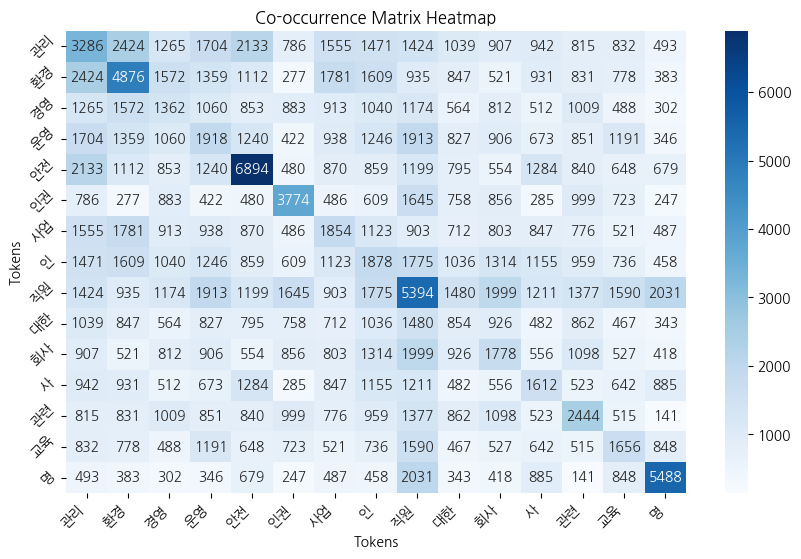

In [ ]:
font_path = './NanumGothic.otf'
font_prop = fm.FontProperties(fname=font_path)

plt.figure(figsize=(10, 6))
sns.heatmap(co_occurrence_df, annot=True, cmap='Blues', fmt='g', cbar=True)
plt.title('Co-occurrence Matrix Heatmap')
plt.xlabel('Tokens')
plt.ylabel('Tokens')
plt.xticks(rotation=45, ha="right", fontproperties=font_prop)
plt.yticks(rotation=45, ha="right", fontproperties=font_prop)
plt.show()

In [ ]:
co_occurrence_df

,관리,환경,경영,운영,안전,인권,사업,인,직원,대한,회사,사,관련,교육,명
관리,2318,1658,851,1112,1474,558,993,958,905,702,591,627,514,519,306
환경,1658,3336,1094,892,766,184,1163,1041,631,545,348,606,491,508,233
경영,851,1094,966,684,572,594,614,680,771,360,535,357,647,326,179
운영,1112,892,684,1400,853,272,566,844,1288,560,586,441,569,770,227
안전,1474,766,572,853,4718,283,564,556,760,541,352,869,479,422,435
인권,558,184,594,272,283,2646,330,397,1066,495,567,180,681,477,154
사업,993,1163,614,566,564,330,1334,769,585,484,552,574,555,349,287
인,958,1041,680,844,556,397,769,1378,1158,709,924,789,615,440,262
직원,905,631,771,1288,760,1066,585,1158,3664,982,1335,818,926,1089,1408
대한,702,545,360,560,541,495,484,709,982,600,626,311,560,303,222


### 정규화 (Normalize)

In [ ]:
# Convert to DataFrame for easier manipulation
co_occurrence_df = pd.DataFrame(co_occurrence_df).fillna(0)

# Step 3: Normalize the co-occurrence matrix
max_value = co_occurrence_df.values.max()
normalized_co_occurrence_df = co_occurrence_df / max_value  # Normalize each value to range [0, 1]

# Display the normalized co-occurrence DataFrame
print(normalized_co_occurrence_df)

          관리        환경        경영        운영        안전        인권        사업  \
관리  0.476646  0.351610  0.183493  0.247171  0.309399  0.114012  0.225558   
환경  0.351610  0.707282  0.228024  0.197128  0.161300  0.040180  0.258341   
경영  0.183493  0.228024  0.197563  0.153757  0.123731  0.128082  0.132434   
운영  0.247171  0.197128  0.153757  0.278213  0.179867  0.061213  0.136060   
안전  0.309399  0.161300  0.123731  0.179867  1.000000  0.069626  0.126197   
인권  0.114012  0.040180  0.128082  0.061213  0.069626  0.547433  0.070496   
사업  0.225558  0.258341  0.132434  0.136060  0.126197  0.070496  0.268930   
인   0.213374  0.233391  0.150856  0.180737  0.124601  0.088338  0.162895   
직원  0.206556  0.135625  0.170293  0.277488  0.173919  0.238613  0.130983   
대한  0.150711  0.122860  0.081810  0.119959  0.115318  0.109951  0.103278   
회사  0.131564  0.075573  0.117784  0.131419  0.080360  0.124166  0.116478   
사   0.136641  0.135045  0.074267  0.097621  0.186249  0.041340  0.122860   
관련  0.118219

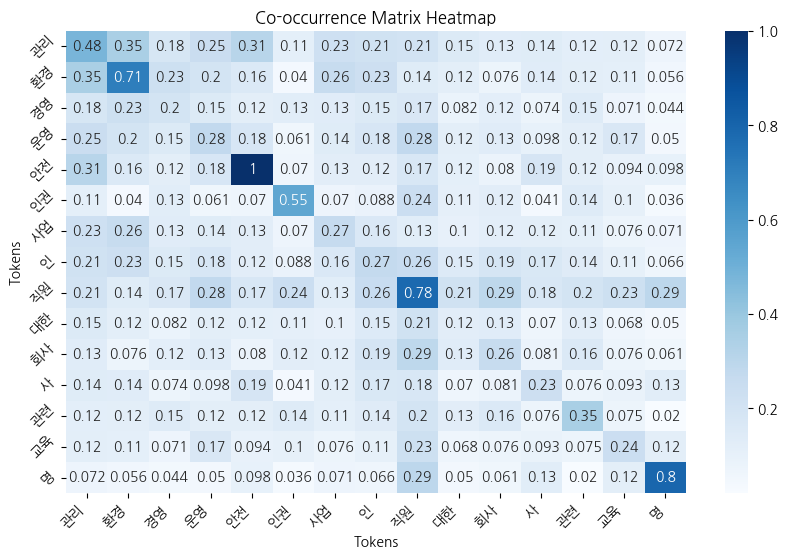

In [ ]:
font_path = './NanumGothic.otf'
font_prop = fm.FontProperties(fname=font_path)

plt.figure(figsize=(10, 6))
sns.heatmap(normalized_co_occurrence_df, annot=True, cmap='Blues', fmt='.2g', cbar=True)
plt.title('Co-occurrence Matrix Heatmap')
plt.xlabel('Tokens')
plt.ylabel('Tokens')
plt.xticks(rotation=45, ha="right", fontproperties=font_prop)
plt.yticks(rotation=45, ha="right", fontproperties=font_prop)
plt.show()

### Semantic Network

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.Graph()

# Add edges from the filtered co-occurrence matrix
for token, connections in normalized_co_occurrence_df.items():
    for related_token, count in connections.items():
        G.add_edge(token, related_token, weight=count)

# Optional: Remove nodes with no edges
G.remove_nodes_from(list(nx.isolates(G)))


In [ ]:
print(G)

Graph with 15 nodes and 88 edges


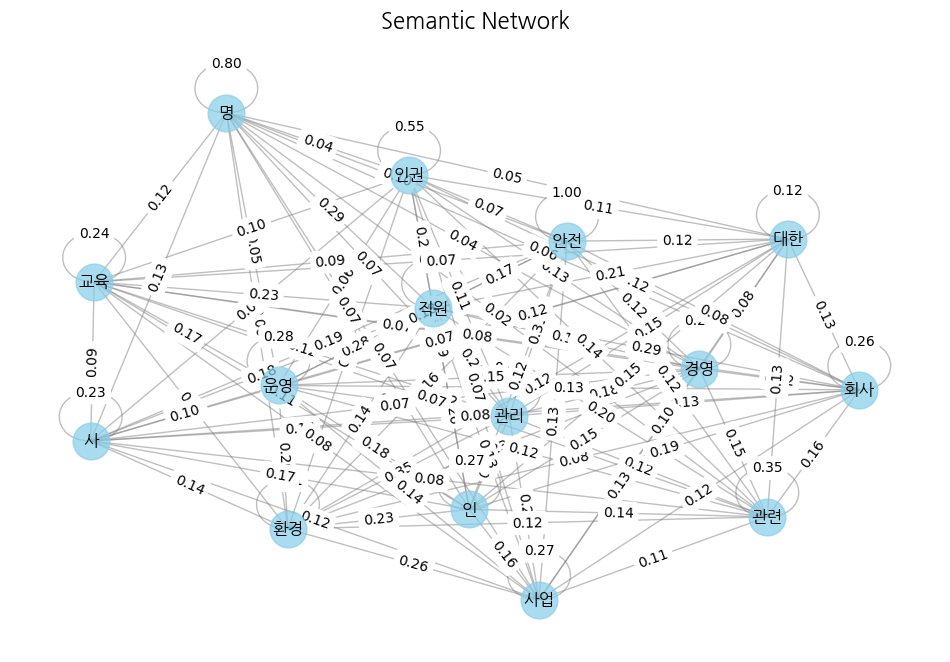

In [ ]:
# Define font properties
font_path = './NanumGothic.otf'
font_prop = fm.FontProperties(fname=font_path)

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Positioning algorithm
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12, font_family=font_prop.get_name())

# Add edge labels with formatted values
edge_labels = nx.get_edge_attributes(G, 'weight')
# Format edge labels to show exactly three decimal places
formatted_edge_labels = {k: f"{v:.2f}" for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=formatted_edge_labels, font_color='black')

plt.title("Semantic Network", fontsize=16)
plt.axis('off')  # Turn off the axis
plt.show()

# Reference

https://github.com/lovit/soynlp
https://medium.com/@sanjithkumar986/text-preprocessing-for-nlp-part-4-99654ff236c6
https://ayselaydin.medium.com/1-text-preprocessing-techniques-for-nlp-37544483c007